In [112]:
import seaborn as sns
import requests
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

## Data ingest (req 2.i.1)

In [100]:
url = 'https://datausa.io/api/data?drilldowns=State&measures=Population'
r = requests.get(url)
# print(r.json())
try:
    df = pd.DataFrame(r.json()['data'])
except:
    print('Error: ', r.json()['error'])
print(df.head())

    ID State       State  ID Year  Year  Population  Slug State
0  04000US01     Alabama     2020  2020     4893186     alabama
1  04000US02      Alaska     2020  2020      736990      alaska
2  04000US04     Arizona     2020  2020     7174064     arizona
3  04000US05    Arkansas     2020  2020     3011873    arkansas
4  04000US06  California     2020  2020    39346023  california


## Summary information about the dataset (req 2.i.5)

In [101]:
print(df.describe())
print()
print(df.shape)
# find unique values of state column
df.State.unique()

           ID Year    Population
count   416.000000  4.160000e+02
mean   2016.500000  6.210951e+06
std       2.294047  7.014264e+06
min    2013.000000  5.701340e+05
25%    2014.750000  1.794161e+06
50%    2016.500000  4.268840e+06
75%    2018.250000  6.956380e+06
max    2020.000000  3.934602e+07

(416, 6)


array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

## First visualization (not a req but I thought the visualization was interesting to look at)
This one is incredibly busy but gave me some information on how to continue with this project

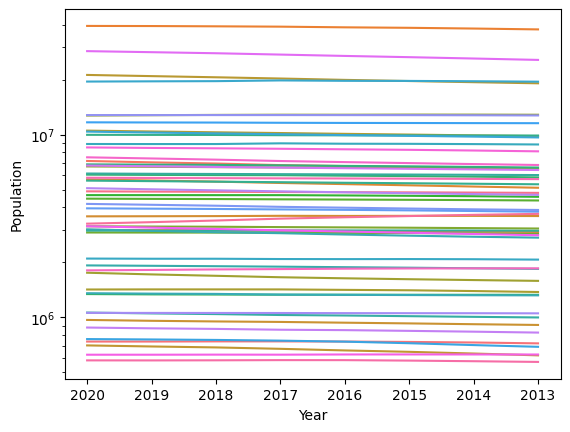

In [102]:
f, ax = plt.subplots()
ax.set(yscale='log')
plot = sns.lineplot(x=df.Year, y=df.Population, hue=df.State)
plot.legend().remove()
plt.show()

In [103]:
NewEngland = {"massachusetts","rhode-island","vermont","maine","new-hampshire","connecticut"}
MiddleAtlantic = {"new-jersey","new-york","delaware","maryland","pennsylvania"}
South = {"mississippi","alabama","louisiana","missouri","virginia","kentucky","tennessee","georgia","south-carolina","north-carolina","west-virginia","arkansas","florida"}
Midwest = {"indiana","ohio","kansas","illinois","michigan","iowa","minnesota","north-dakota","nebraska","south-dakota","wisconsin"}
Southwest = {"arizona","new-mexico","oklahoma","texas"}
West = {"idaho","alaska","california","hawaii","montana","nevada","washington","wyoming","utah","oregon","colorado"}
Other = {"puerto-rico","district-of-columbia"}

## Modifying dataframe (req 2.i.3)

In [104]:
df['Region'] = df['Slug State'].apply(lambda x: 'NewEngland' if x in NewEngland else ('MiddleAtlantic' if x in MiddleAtlantic else ('South' if x in South else ('Midwest' if x in Midwest else ('Southwest' if x in Southwest else ('West' if x in West else 'Other'))))))

In [105]:
df.Region

0          South
1           West
2      Southwest
3          South
4           West
         ...    
411         West
412        South
413      Midwest
414         West
415        Other
Name: Region, Length: 416, dtype: object

### Verifying that the transformation I did is correct

In [106]:
# get counts of each region
df.Region.value_counts()

South             104
West               88
Midwest            88
NewEngland         48
MiddleAtlantic     40
Southwest          32
Other              16
Name: Region, dtype: int64

In [107]:
df.where(df.Region == 'Other').dropna()

,ID State,State,ID Year,Year,Population,Slug State,Region
8,04000US11,District of Columbia,2020.0,2020,701974.0,district-of-columbia,Other
51,04000US72,Puerto Rico,2020.0,2020,3255642.0,puerto-rico,Other
60,04000US11,District of Columbia,2019.0,2019,692683.0,district-of-columbia,Other
103,04000US72,Puerto Rico,2019.0,2019,3318447.0,puerto-rico,Other
112,04000US11,District of Columbia,2018.0,2018,684498.0,district-of-columbia,Other
155,04000US72,Puerto Rico,2018.0,2018,3386941.0,puerto-rico,Other
164,04000US11,District of Columbia,2017.0,2017,672391.0,district-of-columbia,Other
207,04000US72,Puerto Rico,2017.0,2017,3468963.0,puerto-rico,Other
216,04000US11,District of Columbia,2016.0,2016,659009.0,district-of-columbia,Other
259,04000US72,Puerto Rico,2016.0,2016,3529385.0,puerto-rico,Other


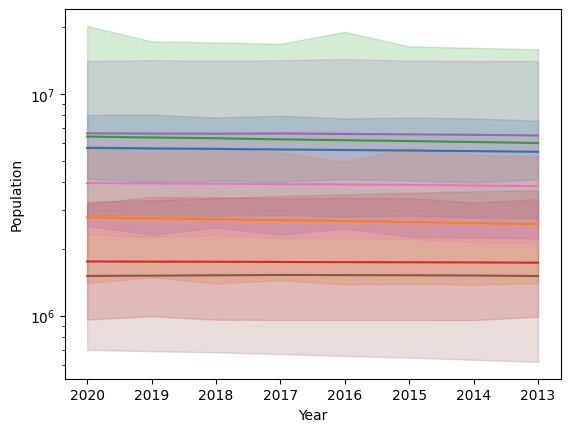

In [108]:
f, ax = plt.subplots()
ax.set(yscale='log')
plot = sns.lineplot(x=df.Year, y=df.Population, hue=df.Region)
plot.legend().remove()
plt.show()

In [111]:
df1 = df.groupby(['Region', 'Year']).agg('mean').reset_index()
df1['Population'][0:5]
df2 = pd.DataFrame(df1)
# df2

/var/folders/xz/yj17nxhj4c91jh7gz4x83f1c0000gn/T/ipykernel_88192/1242370179.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df.groupby(['Region', 'Year']).agg('mean').reset_index()


## Best visualization so far (again not a requirement but I though it was an interesting addition)

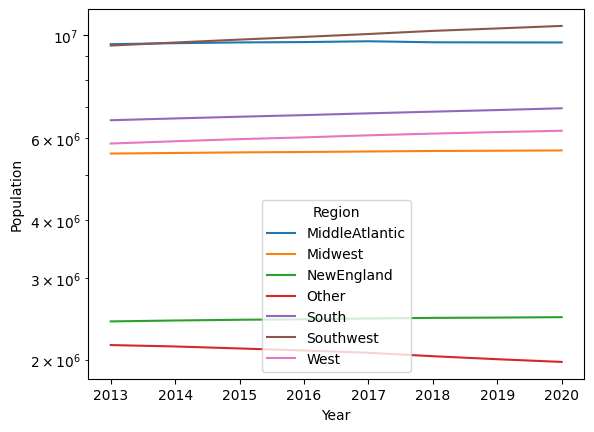

In [110]:
f, ax = plt.subplots()
ax.set(yscale='log')
plot = sns.lineplot(x=df1.Year, y=df1.Population, hue=df1.Region)
# plot.legend().remove()
plt.show()

## File output (req 2.i.4 & 2.i.2)

In [117]:
output_choice = ''
valid_choices = {'csv', 'json', 'sql'}
while output_choice not in valid_choices:
    output_choice = input('Select output type: (csv/json/sql) ').lower()
    if output_choice not in valid_choices:
        print('Invalid choice. Try again.')
        print()

if output_choice == 'csv':
    df.to_csv('output.csv')
    print('CSV file saved.')
elif output_choice == 'json':
    df.to_json('output.json')
    print('JSON file saved.')
elif output_choice == 'sql':
    conn = sqlite3.connect('output.db')
    df.to_sql('output', conn)
    conn.close()
    print('SQL database saved.')

Invalid choice. Try again.



## Testing sql output
(don't run unless you selected sql in the above cell)

In [114]:
conn = sqlite3.connect('output.db')
df_test = pd.read_sql('SELECT * FROM output', conn)
df_test

,index,ID State,State,ID Year,Year,Population,Slug State,Region
0,0,04000US01,Alabama,2020,2020,4893186,alabama,South
1,1,04000US02,Alaska,2020,2020,736990,alaska,West
2,2,04000US04,Arizona,2020,2020,7174064,arizona,Southwest
3,3,04000US05,Arkansas,2020,2020,3011873,arkansas,South
4,4,04000US06,California,2020,2020,39346023,california,West
...,...,...,...,...,...,...,...,...
411,411,04000US53,Washington,2013,2013,6819579,washington,West
412,412,04000US54,West Virginia,2013,2013,1853619,west-virginia,South
413,413,04000US55,Wisconsin,2013,2013,5706871,wisconsin,Midwest
414,414,04000US56,Wyoming,2013,2013,570134,wyoming,West
